## Линейная модель

In [1]:
%pylab inline
# from ipywidgets import interact, interactive, fixed

Populating the interactive namespace from numpy and matplotlib


если данные, возможно после ряда преобразований, выстраиваются в воображаемую линию, то их распределение можно смоделировать уравнением прямой:
$$y=ax+b$$, где $a$ - коэффициент, характеризующий угол наклона, $b$ - коэффициент, характеризующий отклонение от нуля.

In [2]:
#загрузка данных
lps=loadtxt('lps')
lps.shape

(45, 2)

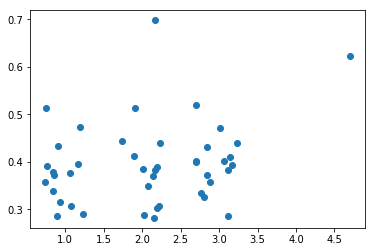

In [3]:
tt=lps[:,0]
isi=diff(tt)
vv=lps[1:,1]

xx=log2(isi) #вместо исходных значений возмьем их логарифм
plot(xx,vv,'o');

Некоторые значения резко выделяются - это так называемые выбросы. Перед дальнейшими вычислениями их лучше исключить из набора данных.

In [4]:
porogRT=0.6
iiGood=find(vv<=porogRT)
vv=vv[iiGood].copy()  #copy нужно, чтобы не изменился исходный массив lps, второй колонкой которого были vv
xx=xx[iiGood].copy()
vv.shape

(42,)

Для расчета воспользуемся функцией получения коэффициентов полиномов. Уравнение прямой представляет собой полином первой степени.

In [5]:
p=polyfit(xx,vv,1)
print('y = ax + b = {a:.4f}x + {b:.3f}'.format(a=p[0],b=p[1]))

y = ax + b = 0.0068x + 0.368


Для графического отображения линии тренда достаточно получить координаты двух ее точек. Для наглядности отобразим график линии тренда поверх исходных данных (заметьте отсутствие выбросов).

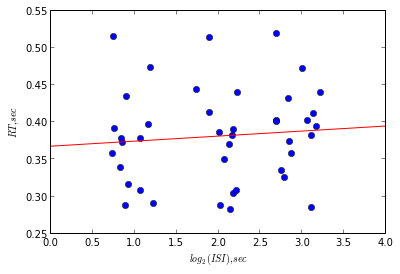

In [48]:
xxLine=[0,4]
yyLine=polyval(p, xxLine)
plot(xx,vv,'o')
plot(xxLine, yyLine, 'r')
ylabel(r'$RT, sec$'); xlabel(r'$log_2(ISI), sec$')

Итого, согласно нашей модели зависимость ВР от МСИ можно выразить уравнением:
    $$RT=0.0068 log_2ISI + 0.368$$, 
где $ISI$ - межстимульный интервал в серии стимулов.

Опираясь на полученную модель, можно предсказать какое будет в среднем ВР при иных МСИ.


In [55]:
altISI=3 #sec
altRT=0.0068*log2(altISI) + 0.368
altRT

0.37877774500490385

Можно предсказать среднее ВР для МСИ вне исследованного диапазона (экстраполяция), но надо понимать, что такая оценка будет менее достоверной.

In [56]:
0.0068*log2(16) + 0.368  # прогноз ВР для МСИ=16 с

0.3952

Следует заметить, что более корректно расчет модели производить отдельно для зрительных и слуховых стимулов, поскольку реакции на них отличаются по времени у большинства людей.